<a href="https://colab.research.google.com/github/SvA1/Compling/blob/master/HW5_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

In [0]:
!pip install protobuf tqdm wheel

In [0]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

In [52]:
cd bigartm

/content/bigartm


In [53]:
mkdir build

mkdir: cannot create directory ‘build’: File exists


In [54]:
cd build

/content/bigartm/build


In [0]:
!cmake ..

In [0]:
!make

In [0]:
!pip install python/bigartm*.whl -U

In [57]:
cd ../..

/content


In [0]:
!pip install pymorphy2[fast] nltk gensim

In [18]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string

from nltk.tokenize import word_tokenize

morph = MorphAnalyzer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

In [15]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
with open('habr_texts.txt', encoding='utf-8') as file:
    source = file.read().splitlines()

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)

**Нграммы**

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', min_count=8, threshold=0.3)
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

In [0]:
def write_to_vw(path, texts):
  
  with open(path, 'w', encoding='utf-8') as file:
    for i, text in enumerate(texts):
      counter = Counter(text)
      document = f'doc_{i} '
      vw_text = ' '.join([f'{x}:{counter[x]}' for x in counter])
      file.write(f'{document}{vw_text}'+'\n')

In [0]:
write_to_vw('habr_texts.vw', ngrammed_texts)

In [24]:
!cat habr_texts.vw

doc_0 это:5 библиотека:7 разработать:1 язык:1 платформа:1 упрощать:1 работа:5 шина:1 дать:1 который:15 использоваться:2 построение:1 распределенный:1 приложение:1 реализация:4 качество:4 мочь:3 выступать:1 менеджер:1 случай:6 область_видимость:1 ограничиваться:1 процесс:2 проинициализировать:1 экземпляр:1 содержание:1 команда:20 событиякоманда:1 событие:19 контракт:6 сообщение:32 роутинг:2 формат:3 консьюмер:12 конфигурация:6 контейнер:4 наблюдатель:3 новое:2 заключение:2 опрос:1 использовать:5 заложить:2 основный:2 тип:11 сигнализировать:2 необходимость:1 выполнить:2 некий:2 действие:3 наиболее:1 содержательный:1 наименование:5 желательно:1 структура:2 глагол:1 существительное:1 осуществляться_помощь:2 метод:8 интерфейс:7 указание:3 получатель:1 очередь:5 отправка:4 случиться:2 интересно:1 набор:2 подписчик:2 паттерн:1 реагировать:2 например:1 терминология:1 различие:1 доставляться:1 единственный:1 исполнитель:1 даба:1 избежать:1 дублирование:1 выполнение:2 изображение:3 статья:3 врем

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

In [0]:
dictionary = artm.Dictionary()

In [28]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000) 

artm.Dictionary(name=02bff6ed-034e-4555-be2e-604fb3d5f2df, num_entries=16001)

In [0]:
dictionary.save_text('dict.txt')

In [60]:
!cat dict.txt

name: 02bff6ed-034e-4555-be2e-604fb3d5f2df num_items: 4121
token, class_id, token_value, token_tf, token_df
употребить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бесплатный_билет, @default_class, 5.0575858949741814e-06, 14.0, 11.0
участие_бесплатный, @default_class, 4.335073754191399e-06, 12.0, 12.0
понижение, @default_class, 9.031403351400513e-06, 25.0, 23.0
индивидуальный_особенность, @default_class, 3.973817456426332e-06, 11.0, 11.0
цепочка, @default_class, 0.00010801558528328314, 299.0, 201.0
затухание, @default_class, 1.2282708667044062e-05, 34.0, 24.0
аполлон, @default_class, 6.141354333522031e-06, 17.0, 12.0
носить_устройство, @default_class, 1.1921452824026346e-05, 33.0, 17.0
веселие, @default_class, 6.502610631287098e-06, 18.0, 17.0
второстепенный, @default_class, 1.3005221262574196e-05, 36.0, 29.0
отдавать_предпочтение, @default_class, 1.047642854246078e-05, 29.0, 27.0
критик, @default_class, 9.392660103912931e-06, 26.0, 19.0
боевик, @default_class, 4.335073754191399

In [0]:
dictionary = artm.Dictionary()
dictionary.load_text('dict.txt')

**ARTM модели**

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
def init_model(n_topics, tau_1, tau_2):
  model_artm = artm.ARTM(topic_names=[f'topic_{i}' for i in range(n_topics)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=tau_1, 
                                            class_ids=['@default_class'],
                                            topic_names=[f'topic_{i}' for i in range(n_topics)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=tau_2, 
                                            topic_names=[f'topic_{i}' for i in range(n_topics)])
                                    ]
                        )
  model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
  model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
  model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
  model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
  model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 
  
  model_artm.initialize(dictionary=dictionary, )
  
  return model_artm

In [0]:
def topics(model, n):
  for topic in model.topic_names[:n]:
    print(f'{topic}:')
    try:
      for x in model.score_tracker['TopTokensScore_1'].last_tokens[topic]:
        print(x)
      print('---------')
    except KeyError:
      continue

Sparsity Phi: 0.862 ARTM)
Sparsity Theta: 0.825 (ARTM)
Kernel contrast: 0.211 (ARTM)
Kernel purity: 0.245 (ARTM)
Perplexity: 374.382 (ARTM)


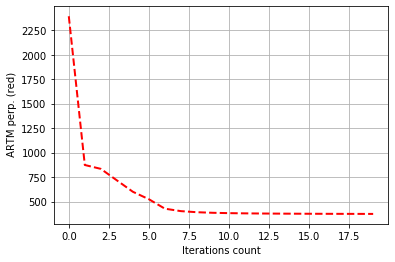

In [76]:
n_topics = 200
model_1 = init_model(n_topics, 0.25, 0.15)
model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_1.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_1.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_1.regularizers['SparsePhi'].tau
theta_tau = model_1.regularizers['SparseTheta'].tau

for i in range(15):
    model_1.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.35))
    model_1.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_1)

In [79]:
topics(model_1, 20)

topic_0:
информация
днк
человеческий
хранение
печень
носитель
уничтожение
алмаз
однако
защита
---------
topic_1:
стекло
монета
устройство
девайс
ноутбук
зарядка
выглядеть
стеклянный
фасад
крыша
---------
topic_2:
человек
лицо
лекция
оценка
фотография
результат
информация
гражданин
шкала
вопрос
---------
topic_3:
конкурс
открытый
портал
голосование
ес
победитель
государственный
цифровой
публикация
россия
---------
topic_4:
процессор
инструкция
регистр
архитектура
память
ядро
битный
ассемблер
производительность
вычисление
---------
topic_5:
регистратор
модель
видео
устройство
аппарат
китайский
запись
случай
видеорегистратор
качество
---------
topic_6:
контроллер
точка_доступ
роль
пост
модуль
пользователь
функция
точка
модель
давать
---------
topic_7:
заказчик
задача
проект
исполнитель
нагрузка
мониторинг
момент
тз
процесс
разработчик
---------
topic_8:
доклад
конференция
разработчик
мероприятие
рассказать
спикер
участник
тема
проект
выступление
---------
topic_9:
книга
глава
автор
идея
п

Sparsity Phi: 0.797 ARTM)
Sparsity Theta: 0.529 (ARTM)
Kernel contrast: 0.265 (ARTM)
Kernel purity: 0.477 (ARTM)
Perplexity: 501.315 (ARTM)


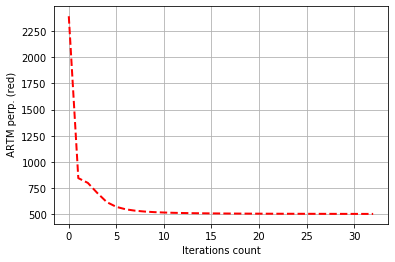

In [66]:
n_topics = 50
model_2 = init_model(n_topics, 0.3, 0.05)
model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)
model_2.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_2.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_2.regularizers['SparsePhi'].tau
theta_tau = model_2.regularizers['SparseTheta'].tau

for i in range(30):
    model_2.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.25))
    model_2.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_2)

Perplexity во второй модели выросло, то есть по идее первая модель должна работать лучше. Тем не менее, существенного скачка в качестве выделения я не заметила.

In [71]:
topics(model_2, 10)

topic_0:
учёный
клетка
человек
животное
ген
вид
мозг
исследование
тело
днк
---------
topic_1:
безопасность
атака
защита
уязвимость
информация
злоумышленник
устройство
компания
пользователь
сеть
---------
topic_2:
дело
книга
человек
жизнь
слово
читать
сказать
именно
мысль
момент
---------
topic_3:
номер
канал
событие
оператор
звонок
связь
карта
участник
вызов
телефон
---------
topic_4:
память
процессор
ядро
производительность
поток
оптимизация
инструкция
результат
архитектура
цикл
---------
topic_5:
камера
видео
метр
устройство
регистратор
модель
плата
производитель
далее
аппарат
---------
topic_6:
устройство
модуль
пользователь
ключ
сертификат
драйвер
функция
токен
пакет
использоваться
---------
topic_7:
сервер
запрос
сервис
е
клиент
проблема
очередь
ответ
база_дать
процесс
---------
topic_8:
доклад
конференция
участник
тема
мероприятие
лекция
рассказать
курс
интересный
презентация
---------
topic_9:
робот
машина
автомобиль
компьютер
город
создать
устройство
создание
разработать
технол

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.234 (ARTM)
Kernel purity: 0.539 (ARTM)
Perplexity: 579.651 (ARTM)


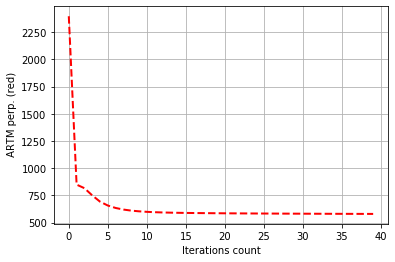

In [73]:
n_topics = 20
model_3 = init_model(n_topics, 0.6, 0.3)
model_3.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=40)

print_measures(model_3)

In [74]:
view_topics(model_3, 10)

topic_0:
человек
исследование
мозг
учёный
пациент
результат
глаз
случай
некоторый
клетка
---------
topic_1:
устройство
камера
смартфон
модель
звук
телефон
видео
экран
производитель
ноутбук
---------
topic_2:
робот
печать
материал
принтер
деталь
производство
модель
ребёнок
технология
рука
---------
topic_3:
карта
изображение
точка
элемент
объект
анимация
экран
значение
блок
координата
---------
topic_4:
программа
код
память
процессор
ядро
производительность
результат
поток
компилятор
байт
---------
topic_5:
сигнал
плата
датчик
устройство
частота
схема
метр
питание
напряжение
температура
---------
topic_6:
устройство
использование
пользователь
позволять
управление
модуль
поддержка
ключ
сервер
драйвер
---------
topic_7:
запрос
сервер
тест
база_дать
запись
е
таблица
проблема
диск
сервис
---------
topic_8:
проект
язык
программист
разработчик
доклад
конференция
курс
тема
программирование
интересный
---------
topic_9:
земля
энергия
вселенная
звезда
учёный
объект
планета
скорость
её
галактика


**3 темы**




Из первой модели (график обучения выше - model_1):

Черная пятница

```
скидка
день
акция
подарок
месяц
заказ
праздник
чёрный_пятница
рубль
цена
```

Инвестиции
```
компания
инвестор
инвестиция
рейтинг
сделка
акция
стоимость
продажа
сумма
счёт
```

Технология виртуальной реальности
```
рынок
виртуальный_реальность
компания
продукт
реальность
технология
пользователь
сегмент
контент
виртуальный
```

**Параметры**



*   Изменяла количество тем. Кажется, что меньшее количество тем приводило к выделению более абстрактных тем
*   Добавляла регуляризаторы, показалось, что с ними быстрее сходятся модели

